<a href="https://colab.research.google.com/github/SergioCortes98/Aprendizaje-Automatico/blob/main/Actividad5_act.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TAREA 5
## Sergio Cortes Cepeda
##Matricula:1731225

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Cargar tus datos
ruta = "/content/sample_data/run_activitiesAA.csv"
df = pd.read_csv(ruta, encoding='latin-1')
df.head(48)

,Tipo de actividad,Fecha,TÃ­tulo,Distancia,CalorÃ­as,Tiempo,Frecuencia cardiaca media,FC mÃ¡xima,Cadencia de carrera media,Cadencia de carrera mÃ¡xima,...,Ascenso total,Descenso total,Longitud media de zancada,Pasos,Mejor tiempo de vuelta,NÃºmero de vueltas,Tiempo en movimiento,Tiempo transcurrido,Altura mÃ­nima,Altura mÃ¡xima
0,Carrera,09/11/2025 07:06,Monterrey Carrera,30.43,"2,435",03:13:09,173,190,173,185,...,225,225,0.91,"33,436",02:58.7,31,03:12:22,03:13:09,515,574
1,Carrera,02/11/2025 06:47,San Pedro Garza GarcÃ­a Carrera,7.45,573,00:44:38,164,176,175,188,...,--,--,0.95,"7,896",03:03.5,8,00:44:28,00:44:38,598,602
2,Carrera,26/10/2025 06:37,Guadalupe Carrera,14.74,"1,235",01:32:22,176,191,169,188,...,181,180,0.94,"15,654",04:42.0,15,01:32:19,01:32:22,482,531
3,Carrera,05/10/2025 07:07,San Pedro Garza GarcÃ­a Carrera,12.12,990,01:14:00,174,191,167,177,...,173,172,0.98,"12,384",00:45.8,13,01:13:49,01:14:00,593,639
4,Carrera,07/06/2025 08:23,Carrera,2.61,256,00:19:22,164,184,162,224,...,--,--,0.83,"3,150",04:22.9,3,00:19:17,00:19:22,--,--
5,Carrera,06/06/2025 19:43,San NicolÃ¡s de los Garza Carrera,2.73,307,00:24:49,163,189,138,176,...,--,--,0.78,"3,564",01:36.9,10,00:23:59,00:24:49,496,498
6,Entrenamiento en cinta,11/05/2025 12:24,Entrenamiento en cinta,10.27,789,01:00:06,165,177,160,173,...,--,--,1.01,"9,662",04:39.6,10,00:59:33,01:00:06,--,--
7,Entrenamiento en cinta,20/04/2025 15:05,Entrenamiento en cinta,4.70,409,00:30:02,169,185,156,185,...,--,--,0.66,"4,666",04:13.1,5,00:29:53,00:30:03,--,--
8,Carrera,06/04/2025 12:48,San NicolÃ¡s de los Garza Carrera,3.75,296,00:26:48,153,179,160,180,...,7,14,0.87,"4,316",05:58.6,4,00:26:47,00:26:48,487,499
9,Carrera en interiores,29/03/2025 08:19,Carrera en interiores,3.95,256,00:23:22,145,169,155,198,...,--,--,1.08,"3,662",00:00.8,8,00:20:53,00:40:25,--,--


In [ ]:
# Renombrar columnas

df = df.rename(columns={
    "Tipo de actividad": "tipo",
    "Fecha": "fecha",
    "TÃ­tulo": "titulo",
    "Distancia": "distancia_km",
    "CalorÃ­as": "calorias",
    "Tiempo": "Tiempo_Total",
    "Frecuencia cardiaca media": "fc_media",
    "FC mÃ¡xima": "fc_max",
    "Cadencia de carrera media": "cadencia_media",
    "Cadencia de carrera mÃ¡xima": "cadencia_max",
    "Ritmo medio": "ritmo_medio",
    "Ritmo Ã³ptimo": "ritmo_optimo",
    "Ascenso total": "ascenso",
    "Descenso total": "descenso",
    "Longitud media de zancada": "zancada_m",
    "Pasos": "pasos",
    "Mejor tiempo de vuelta": "mejor_vuelta",
    "NÃºmero de vueltas": "num_vueltas",
    "Tiempo en movimiento": "tiempo_mov",
    "Tiempo transcurrido": "tiempo_trans",
    "Altura mÃ­nima": "alt_min",
    "Altura mÃ¡xima": "alt_max"
})
df.columns

Index(['tipo', 'fecha', 'titulo', 'distancia_km', 'calorias', 'Tiempo_Total',
       'fc_media', 'fc_max', 'cadencia_media', 'cadencia_max', 'ritmo_medio',
       'ritmo_optimo', 'ascenso', 'descenso', 'zancada_m', 'pasos',
       'mejor_vuelta', 'num_vueltas', 'tiempo_mov', 'tiempo_trans', 'alt_min',
       'alt_max'],
      dtype='object')

In [ ]:
print(df.dtypes)

tipo               object
fecha              object
titulo             object
distancia_km      float64
calorias           object
Tiempo_Total       object
fc_media            int64
fc_max              int64
cadencia_media      int64
cadencia_max        int64
ritmo_medio        object
ritmo_optimo       object
ascenso            object
descenso           object
zancada_m         float64
pasos              object
mejor_vuelta       object
num_vueltas         int64
tiempo_mov         object
tiempo_trans       object
alt_min            object
alt_max            object
dtype: object


In [ ]:
import numpy as np
import pandas as pd

## Columnas que deben ser numéricas
cols_numericas = [
    "pasos","calorias","alt_min", "alt_max"
]

## Limpieza y conversión
for col in cols_numericas:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)                   # convierte todo a texto
            .str.replace(",", "", regex=False)  # elimina comas
            .str.replace("--", "", regex=False) # elimina guiones
            .str.replace(":", ".", regex=False) # cambia ":" por "." si aplica
            .str.strip()                        # quita espacios
            .replace("", np.nan)                # convierte vacíos en NaN
        )
        df[col] = pd.to_numeric(df[col], errors="coerce")  #conversión a numérico

## Verificación
print(df[cols_numericas].dtypes)

pasos         int64
calorias      int64
alt_min     float64
alt_max     float64
dtype: object


In [ ]:
df.Tiempo_Total.unique()

array(['03:13:09', '00:44:38', '01:32:22', '01:14:00', '00:19:22',
       '00:24:49', '01:00:06', '00:30:02', '00:26:48', '00:23:22',
       '00:57:19', '00:19:57', '07:26.9', '00:30:45', '00:21:40',
       '00:53:46', '03:52.5', '00:32:11', '00:27:14', '00:31:52',
       '00:30:04', '00:24:08', '00:35:04', '00:15:25', '00:32:25',
       '00:13:36', '00:30:06', '00:20:06', '00:31:22', '00:20:18',
       '00:29:00', '00:24:51', '00:27:36', '00:15:04', '00:26:02',
       '00:11:02', '00:38:56', '00:21:04', '00:25:46', '00:10:05',
       '00:22:51', '00:22:00', '00:19:39', '00:28:53', '00:30:03'],
      dtype=object)

In [ ]:
def time_convert(x):
    x = str(x).strip()

    if x in ["", "-", "--", "nan", "NaN"]:
        return None

    parts = x.split(":")


    if len(parts) == 3:
        h = int(parts[0])
        m = int(parts[1])
        s = float(parts[2])   # aquí permite decimales
        return int(h*3600 + m*60 + s)
    elif len(parts) == 2:
        h = 0
        m = int(parts[0])
        s = float(parts[1].replace(',', '.'))
        return int(h*3600 + m*60 + s)

In [ ]:
df.Tiempo_Total=df.Tiempo_Total.apply(time_convert)

In [ ]:
df.ritmo_medio=df.ritmo_medio.apply(time_convert)

In [ ]:
df.ritmo_optimo=df.ritmo_optimo.apply(time_convert)

In [ ]:
df.tiempo_mov=df.tiempo_mov.apply(time_convert)

In [ ]:
df = df.drop(columns=["tiempo_trans", "mejor_vuelta"])


<p align="center">En base a los datos supervisados, se observa una similitud amplia entre el tiempo transcurrido y el tiempo total, por lo cual se toma la decisión de eliminar esta columna.</p>

<p align="center">A su vez tengo 2 columnas tiempo en vueltas y numero de vueltas de las que es un dato inexacto debido a que el número de vueltas es el aproximado al kilómetro, sin embargo el mejor tiempo en vueltas muestra datos que serían físicamente imposibles de aplicar por lo cual, hare omisión de esta columna para poder continuar de manera correcta mi análisis.</p>

In [ ]:
print(df.dtypes)

tipo               object
fecha              object
titulo             object
distancia_km      float64
calorias            int64
Tiempo_Total        int64
fc_media            int64
fc_max              int64
cadencia_media      int64
cadencia_max        int64
ritmo_medio         int64
ritmo_optimo        int64
ascenso            object
descenso           object
zancada_m         float64
pasos               int64
num_vueltas         int64
tiempo_mov          int64
alt_min           float64
alt_max           float64
dtype: object


<p align="center">Para esta tarea usare un método no supervisado de DBSCAN.
Debido a que encuentra agrupamientos no lineales, y pues mis variables fisiológicas no son lineales.<p>

<p align="center">A su vez detecta datos antipáticos (Ruido), debido a que en algunas ocasiones pues no es constante mis entrenamientos y pueden mostrar datos donde camino o aplico algún sprint. <p>

<p align="center">Por ultimo lo considero óptimo para analizar patrones en los entrenamientos.<p>


In [ ]:
# Variables independientes (X) y dependiente (y)

X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['calorias'])
y = df['calorias']

# tamaños
print("Tamaño de X:", X.shape)
print("Tamaño de y:", y.shape)
X.head(48)

Tamaño de X: (47, 14)
Tamaño de y: (47,)


,distancia_km,Tiempo_Total,fc_media,fc_max,cadencia_media,cadencia_max,ritmo_medio,ritmo_optimo,zancada_m,pasos,num_vueltas,tiempo_mov,alt_min,alt_max
0,30.43,11589,173,190,173,185,381,225,0.91,33436,31,11542,515.0,574.0
1,7.45,2678,164,176,175,188,359,176,0.95,7896,8,2668,598.0,602.0
2,14.74,5542,176,191,169,188,376,324,0.94,15654,15,5539,482.0,531.0
3,12.12,4440,174,191,167,177,366,244,0.98,12384,13,4429,593.0,639.0
4,2.61,1162,164,184,162,224,446,209,0.83,3150,3,1157,NaN,NaN
5,2.73,1489,163,189,138,176,546,198,0.78,3564,10,1439,496.0,498.0
6,10.27,3606,165,177,160,173,351,280,1.01,9662,10,3573,NaN,NaN
7,4.70,1802,169,185,156,185,383,503,0.66,4666,5,1793,NaN,NaN
8,3.75,1608,153,179,160,180,429,313,0.87,4316,4,1607,487.0,499.0
9,3.95,1402,145,169,155,198,355,146,1.08,3662,8,1253,NaN,NaN


In [ ]:
cols_cluster = [
    "distancia_km", "calorias", "Tiempo_Total", "ritmo_medio",
    "fc_media", "fc_max", "cadencia_media", "zancada_m",
    "ascenso", "descenso", "pasos"
]

df_cluster = df[cols_cluster].copy()

# LIMPIEZA GENERAL: quitar '--', comas, espacios, etc. y pasar a float
for col in cols_cluster:
    df_cluster[col] = (
        df_cluster[col]
        .astype(str)
        .str.replace(",", "", regex=False)   # por si hay separador de miles
        .str.replace("--", "", regex=False)  # quita los '--'
        .str.strip()
        .replace("", np.nan)                 # vacíos -> NaN
    )
    df_cluster[col] = pd.to_numeric(df_cluster[col], errors="coerce")

# Quitar NA
df_cluster = df_cluster.dropna()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Escalado
scaler = StandardScaler()
X = scaler.fit_transform(df_cluster)

# DBSCAN
db = DBSCAN(eps=0.8, min_samples=4)
labels = db.fit_predict(X)

df_cluster["cluster"] = labels

# Métricas (solo si hay más de 1 cluster válido)
mask = labels != -1
if len(set(labels[mask])) > 1:
    sil = silhouette_score(X[mask], labels[mask])
    cal = calinski_harabasz_score(X[mask], labels[mask])
    dav = davies_bouldin_score(X[mask], labels[mask])
else:
    sil = cal = dav = None

sil, cal, dav


(None, None, None)

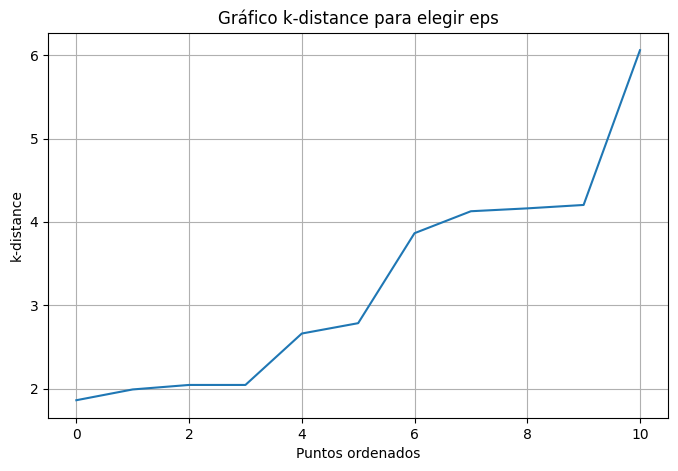

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

k = 4   # mismo que min_samples en DBSCAN
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# tomamos solo la distancia al k-ésimo vecino
k_dist = np.sort(distances[:, k-1])

plt.figure(figsize=(8,5))
plt.plot(k_dist)
plt.ylabel("k-distance")
plt.xlabel("Puntos ordenados")
plt.title("Gráfico k-distance para elegir eps")
plt.grid(True)
plt.show()


<p align="center"> Con esto compruebo  que no se observa un codo definido, por lo que no existe un valor de eps que permita identificar clusters densos de manera natural. Esto indica que DBSCAN no es apropiado para este conjunto de datos<p>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Columnas que usaremos para el clustering
cols_cluster = [
    "distancia_km", "calorias", "Tiempo_Total", "ritmo_medio",
    "fc_media", "fc_max", "cadencia_media", "zancada_m",
    "ascenso", "descenso", "pasos", "alt_min", "alt_max"
]

# Copiamos solo esas columnas
df_cluster = df[cols_cluster].copy()

# Limpieza general: quitar '--', comas, espacios, etc. y pasar a float
for col in cols_cluster:
    df_cluster[col] = (
        df_cluster[col]
        .astype(str)
        .str.replace(",", "", regex=False)
        .str.replace("--", "", regex=False)
        .str.strip()
        .replace("", np.nan)
    )
    df_cluster[col] = pd.to_numeric(df_cluster[col], errors="coerce")

# Quitamos filas con NaN
df_cluster = df_cluster.dropna()

# Escalamos los datos
scaler = StandardScaler()
X = scaler.fit_transform(df_cluster)


<p align="center"> Con esto compruebo  que no se observa un codo definido, por lo que no existe un valor de eps que permita identificar clusters densos de manera natural. Esto indica que DBSCAN no es apropiado para este conjunto de datos<p>

<p align="center">A continuación probare con Mean Shift, hace referencia al agrupamiento por desplazamiento previo esto es conveniente debido a  que no depende de una densidad estricta, a su vez funciona bien con los datos continuos.<p>

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Estimar automáticamente el bandwidth (radio de influencia)
bandwidth = estimate_bandwidth(X, quantile=0.3, n_samples=len(X))
print("Bandwidth estimado:", bandwidth)

# Modelo Mean Shift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
labels = ms.fit_predict(X)

# Guardamos los clusters
df_cluster["cluster_ms"] = labels

n_clusters = len(np.unique(labels))
print("Número de clusters encontrados:", n_clusters)
print("Etiquetas de cluster:", np.unique(labels))


Bandwidth estimado: 3.127110443275907
Número de clusters encontrados: 4
Etiquetas de cluster: [0 1 2 3]


In [ ]:
if n_clusters > 1:
    sil = silhouette_score(X, labels)
    cal = calinski_harabasz_score(X, labels)
    dav = davies_bouldin_score(X, labels)
else:
    sil = cal = dav = None

sil, cal, dav


(np.float64(0.29712484898815356),
 np.float64(6.0616645315277635),
 np.float64(0.9412791112570325))

In [ ]:
resumen_clusters = df_cluster.groupby("cluster_ms").agg(
    distancia_prom_km = ("distancia_km", "mean"),
    tiempo_prom_seg   = ("Tiempo_Total", "mean"),
    ritmo_prom_seg    = ("ritmo_medio", "mean"),
    calorias_prom     = ("calorias", "mean"),
    fc_media_prom     = ("fc_media", "mean"),
    fc_max_prom       = ("fc_max", "mean"),
    cadencia_prom     = ("cadencia_media", "mean"),
    zancada_prom_m    = ("zancada_m", "mean"),
    pasos_prom        = ("pasos", "mean")
).round(2)

resumen_clusters


,distancia_prom_km,tiempo_prom_seg,ritmo_prom_seg,calorias_prom,fc_media_prom,fc_max_prom,cadencia_prom,zancada_prom_m,pasos_prom
cluster_ms,,,,,,,,,
0,4.90,1860.2,393.8,404.2,162.4,181.6,163.2,0.94,5154.8
1,5.26,2535.5,487.5,452.0,146.5,185.5,113.5,1.06,5220.0
2,22.58,8565.5,378.5,1835.0,174.5,190.5,171.0,0.92,24545.0
3,8.97,3185.5,349.0,697.0,167.5,187.0,150.0,1.16,8607.0


In [ ]:
x = "zancada_m"
y = "cadencia_media"


#**Técnica de carrera**


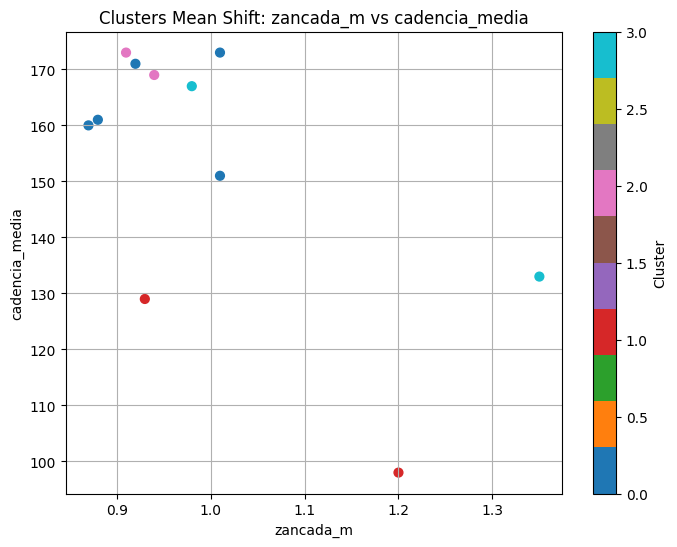

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df_cluster[x],
            df_cluster[y],
            c=df_cluster["cluster_ms"],
            cmap="tab10",
            s=40)

plt.xlabel(x)
plt.ylabel(y)
plt.title(f"Clusters Mean Shift: {x} vs {y}")
plt.grid(True)
plt.colorbar(label="Cluster")
plt.show()


#**Volumen de entrenamiento**

In [ ]:
x = "distancia_km"
y = "Tiempo_Total"


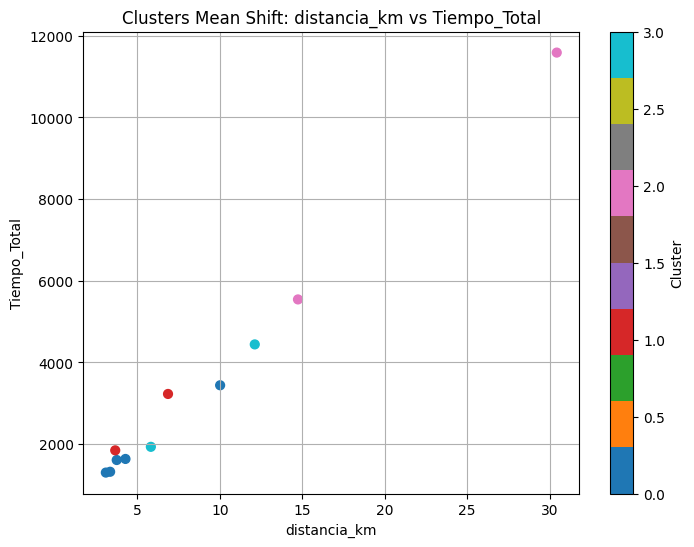

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df_cluster[x],
            df_cluster[y],
            c=df_cluster["cluster_ms"],
            cmap="tab10",
            s=40)

plt.xlabel(x)
plt.ylabel(y)
plt.title(f"Clusters Mean Shift: {x} vs {y}")
plt.grid(True)
plt.colorbar(label="Cluster")
plt.show()


## Mean Shift, no requiere seleccionar manualmente k, por lo cual no se puede usar las métricas utilizadas en k-means, en este caso usamos las métricas de validación interna, entre estas me quedare con Calinski-Harabasz, la cual considero que es la más apropiada.

##Debido a que evalúa la separación entre clusters, es robusta en dataset donde la densidad no es uniforme. <p>


#Conclusion

##En este estudio se aplicó el algoritmo de aprendizaje no supervisado Mean Shift a un conjunto de datos reales provenientes de entrenamientos registrados con mi dispositivo Garmin. A diferencia de algoritmos basados en densidad como DBSCAN, los cuales no lograron identificar grupos debido a la alta dispersión y variabilidad natural del rendimiento deportivo, Mean Shift permitió detectar estructuras subyacentes sin requerir la especificación previa del número de clusters.